# The Problem

Every bank comes up with some or the other schemes for its customers. One such is the portuguese bank which has come up with the scheme of term deposit for its customers. The bank has conducted marketing campaign which were mostly direct phone calls.The manual process they used to follow to find out which customer is likely to avail the term deposit is a tedious one. Hence, we need to make their work easier by predicting which customer has high probability of availing term deposit in near future by building a model.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
pd.set_option('display.max_columns',22)

In [4]:
bank = pd.read_csv(r'../datasets/bank-additional-full.csv',sep=';')

In [8]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
bank.shape

(41188, 21)

In [9]:
bank.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [11]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
bank.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [13]:
cat_cols = bank.select_dtypes(include='O').columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

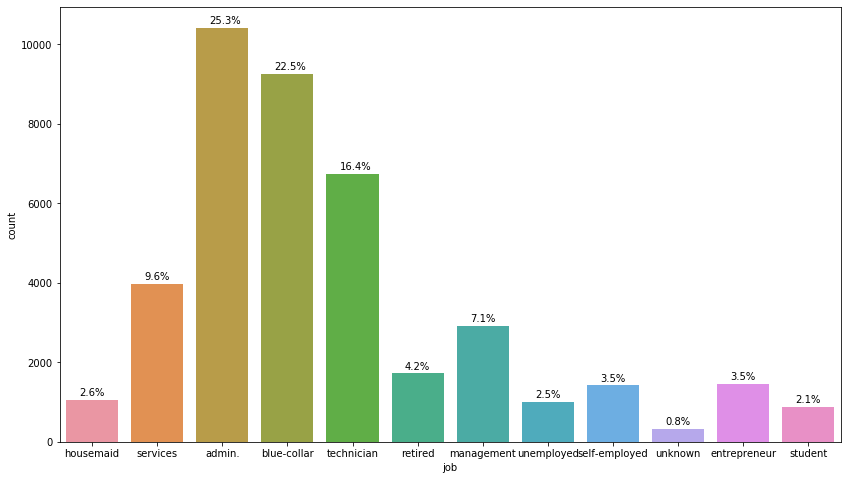

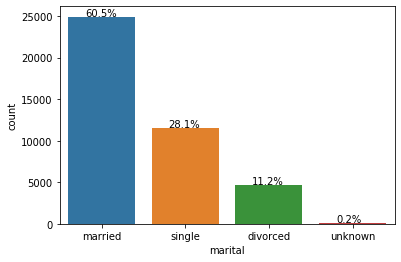

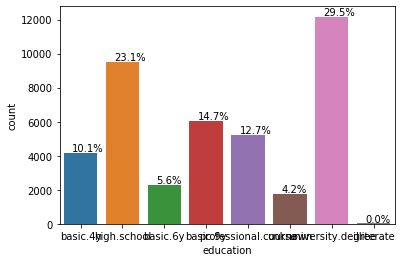

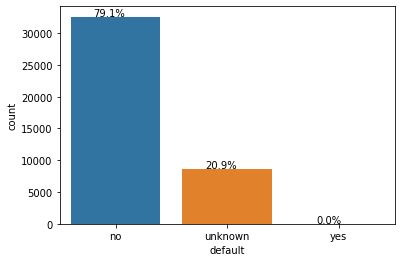

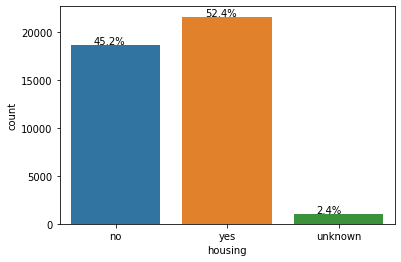

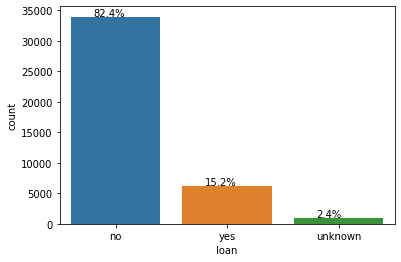

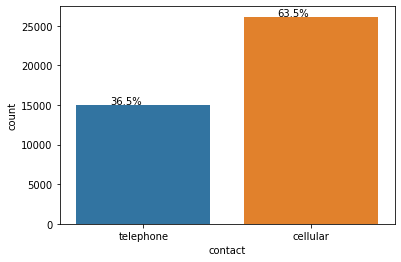

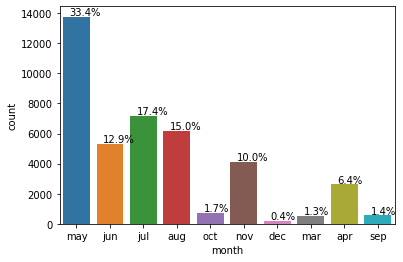

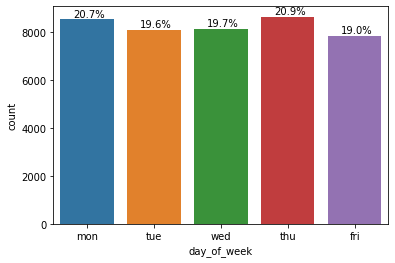

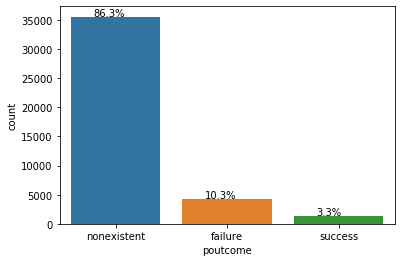

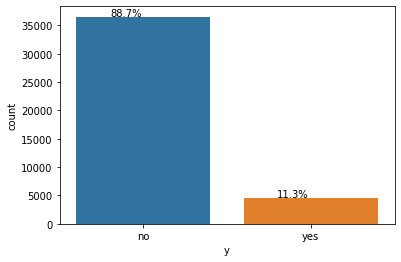

In [27]:
plt.figure(figsize=(14,8))
for col in cat_cols:
    ax = sns.countplot(bank[col])
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/bank.shape[0]*100), (p.get_x()+0.2, p.get_height()+100))
    plt.show()

In [36]:
bank.select_dtypes(exclude='O').columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [37]:
num_cols = bank.select_dtypes(exclude='O').columns
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

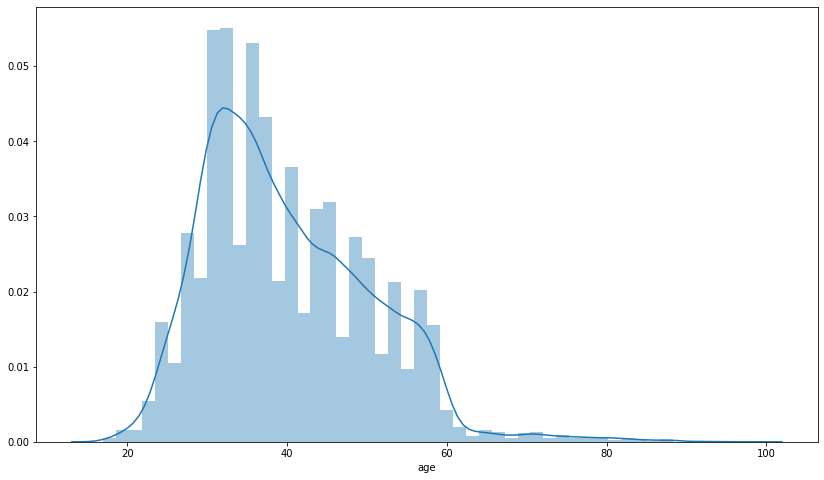

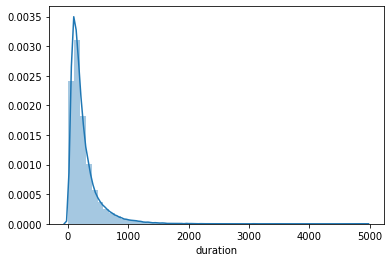

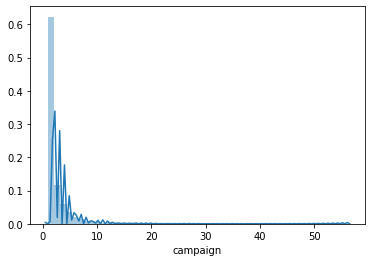

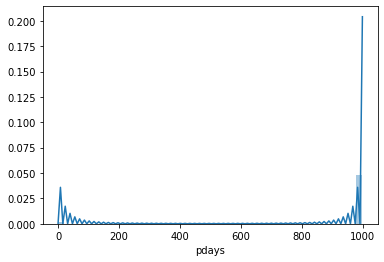

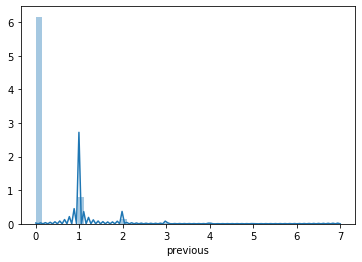

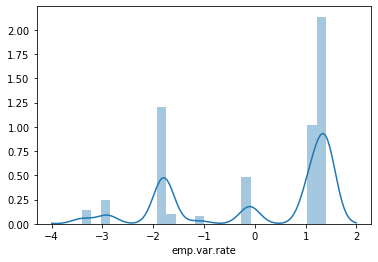

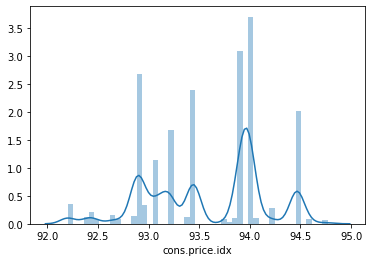

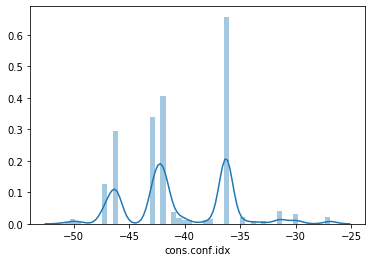

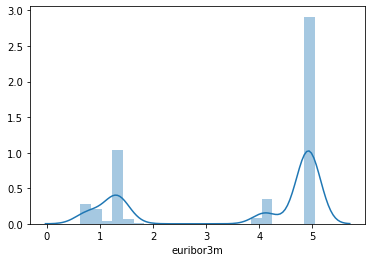

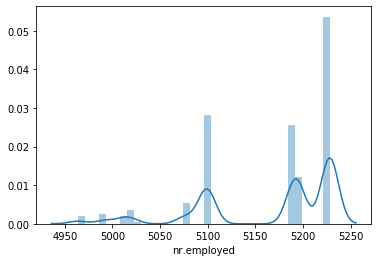

In [38]:
plt.figure(figsize=(14,8))
for col in num_cols:
    sns.distplot(bank[col])
    plt.show()

In [49]:
uqs = {}

for col in bank.columns:
    uqs[col] = bank[col].nunique()
#     print(f'{col} -> {bank[col].nunique()}')
#     uqs.append(bank[col].nunique())

In [ ]:
bank['euribor3m']

In [ ]:
bank['campaign']

In [44]:
uqs.sort()

In [ ]:
uqs_sorted = {sorted(uqs.items() for )}

In [51]:
uqs_sorted = {k,v for k,v in sorted(uqs.items() key=lambda item:item[1] )}

SyntaxError: invalid syntax (<ipython-input-51-b460add94826>, line 1)

In [53]:
uqs = {k: v for k, v in sorted(uqs.items(), key=lambda item: item[1])}

In [58]:
uqs

{'contact': 2,
 'y': 2,
 'default': 3,
 'housing': 3,
 'loan': 3,
 'poutcome': 3,
 'marital': 4,
 'day_of_week': 5,
 'education': 8,
 'previous': 8,
 'month': 10,
 'emp.var.rate': 10,
 'nr.employed': 11,
 'job': 12,
 'cons.price.idx': 26,
 'cons.conf.idx': 26,
 'pdays': 27,
 'campaign': 42,
 'age': 78,
 'euribor3m': 316,
 'duration': 1544}

In [67]:
multi_cols = [col for col in bank.columns if bank[col].nunique()<=12]
multi_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'previous',
 'poutcome',
 'emp.var.rate',
 'nr.employed',
 'y']

In [70]:
bank[multi_cols].dtypes

job              object
marital          object
education        object
default          object
housing          object
loan             object
contact          object
month            object
day_of_week      object
previous          int64
poutcome         object
emp.var.rate    float64
nr.employed     float64
y                object
dtype: object

In [75]:
bank['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [66]:
bank['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

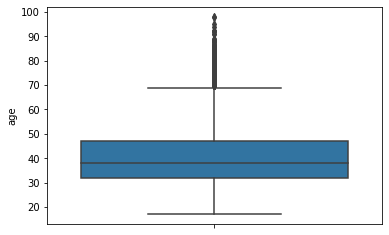

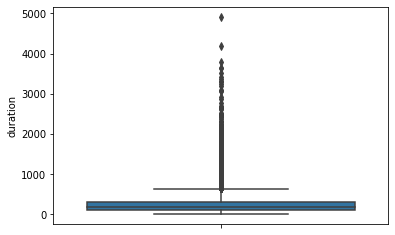

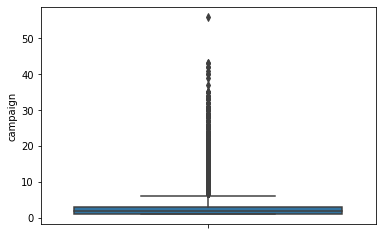

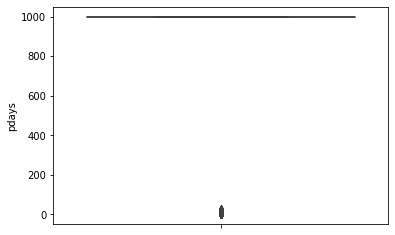

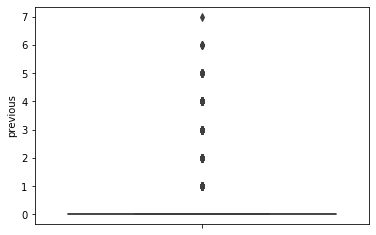

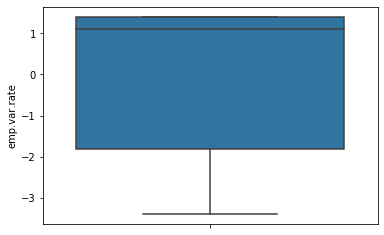

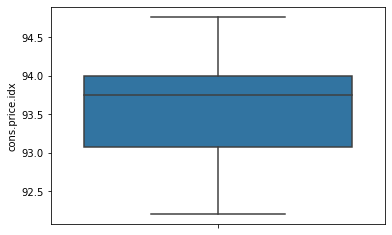

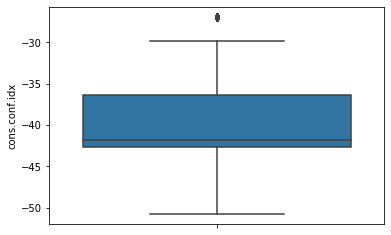

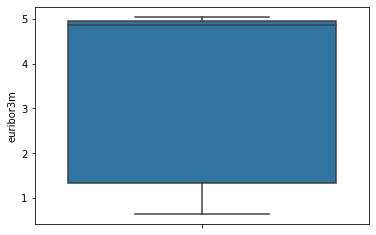

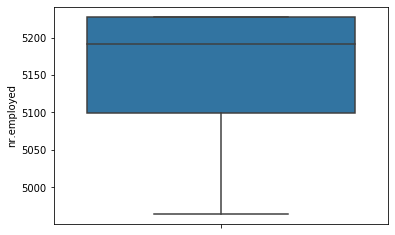

In [78]:
for col in num_cols:
    sns.boxplot(y=bank[col])
    plt.show()